### 목표 설정

- 손글씨 숫자(0~9) 까지 분류하는 모델 작성
- 선형 분류 모델의 불확실성에 대해 (다른 분류도 살펴보기)
- 이미지 데이터에 대한 형태를 이해

In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

### 데이터 확보 
- digit_train 데이터 불러오기

In [3]:
digit = pd.read_csv('./data/digit_train.csv')

In [4]:
# 데이터 확인
# 주의점 : 데이터가 너무 큼, 그대로 불러오면 메모리가 버티기 힘듦
# head() 함수를 이용해 데이터의 형태를 알아보기

digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digit.shape

(42000, 785)

### EDA

In [6]:
# 하나의 데이터를 뽑아와서 데이터의 구조를 살피기

img0 = digit.iloc[0, 1:]

In [11]:
# 뽑아온 데이터의 최댓값과 최솟값을 알아보기

print('max :',img0.max())
print('min :',img0.min())

max : 255
min : 0


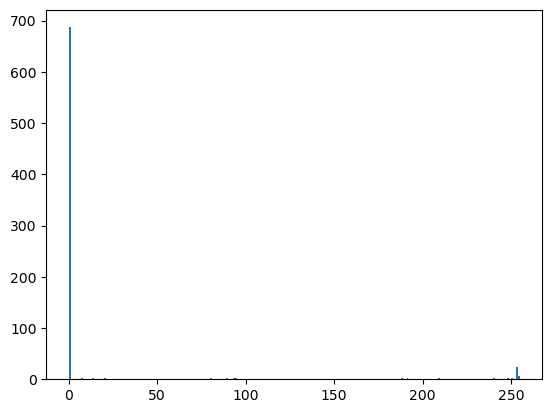

In [12]:
# 데이터의 분포를 알아보기 위해 히스토그램

plt.hist(img0, bins=255)
plt.show()

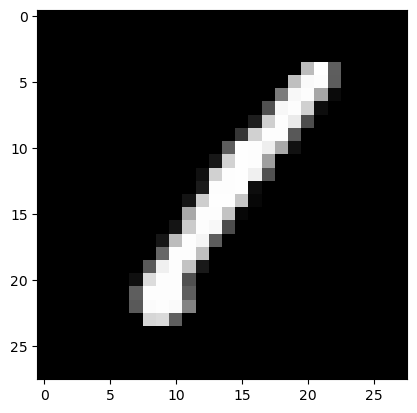

In [17]:
# 실제 데이터 출력

plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

# 검정색은 0, 흰색은 255
# 히스토그램에서 중간 부분의 작은 데이터들은 숫자의 경계선을 표시하는 듯 함

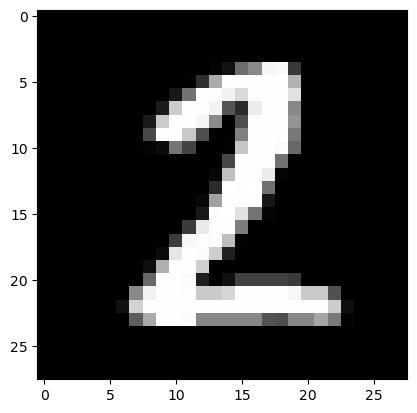

In [19]:
img0 = digit.iloc[40000, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

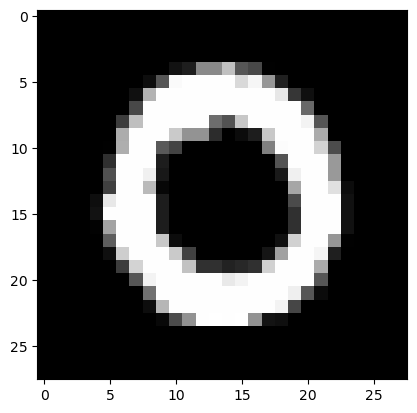

In [42]:
img0 = digit.iloc[1, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

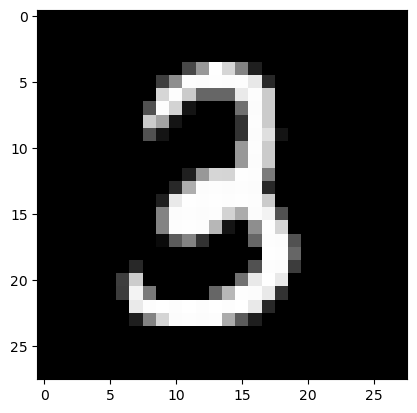

In [22]:
img0 = digit.iloc[20000, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

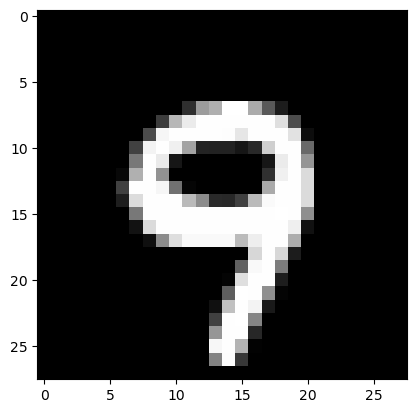

In [23]:
img0 = digit.iloc[11111, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

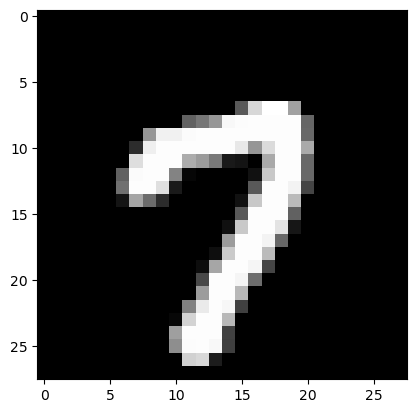

In [36]:
img0 = digit.iloc[12000, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

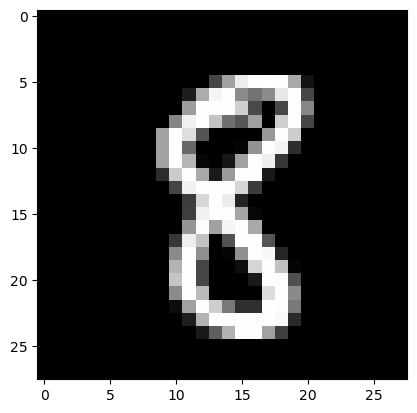

In [47]:
img0 = digit.iloc[10101, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

### 데이터 추출

- 현재 데이터 양은 너무 많음
- 실습의 편의성을 위해 5000개 데이터 추출

In [48]:
X = digit.iloc[0:5000, 1:]
y = digit.iloc[0:5000, 0]

print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [51]:
# 데이터 분할 작업 필요
# train_test_split을 이용해 데이터 분할

# 1. 모듈 불러오기

from sklearn.model_selection import train_test_split

In [54]:
# 2. 모듈 사용해 4등분

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=9)

In [55]:
# 3. 데이터 분할 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 784), (1500, 784), (3500,), (1500,))

### 모델링

- 로지스틱 회귀 모델을 사용해서 손글씨를 분류

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
# 모델 객체 생성

logi = LogisticRegression() # 기본 모델 이용

In [66]:
# 모델 학습

logi.fit(X_train, y_train)

LogisticRegression()

In [67]:
# 모델 예측 

pre =logi.predict(X_test)
pre

array([8, 5, 9, ..., 5, 7, 6], dtype=int64)

In [68]:
# 교차 검증 모듈 불러오기

from sklearn.model_selection import cross_val_score

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
# 교차 검증 확인

result = cross_val_score(logi, X_train, y_train, cv = 5)
print(result)
print(result.mean())

[0.87142857 0.89714286 0.87714286 0.87285714 0.87714286]
0.8791428571428572


In [71]:
# 모델 평가 

logi.score(X_test, y_test)

0.878

### 데이터 스케일링

- 모델의 안정성과 성능을 끌어올리기 위해 데이터 스케일링 진행
- 분류 모델이기 때문에 상대적으로 더 어울리는 스탠다드 스케일링으로 진행